In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import calplot
import matplotlib.ticker 
sns.set()

This project is about investigating the development of street trees over the last 100 years in Copenhagen municipalities. We use the dataset from opendata (https://www.opendata.dk/city-of-copenhagen/gadetraeer#resource-gadetraer.geojson) with 20129 observations and 29 variables, spanding from 1750-2023. geo-data is also available. 

This is interesting because trees are important for cities and people and because there are big difference between the street trees in differenct municipalities, in terms of the amount of trees but also the types of trees and diversity, so it might be beneficial to investigate the tree situation before buying a home in the area.

The purpose of this project is mostly informative, which we thinks works best with the margazine website style. 

On the figures we can see some trends.
while most favor the lind or the classic city tree platan, valby favors ask and brønshøj favors kirsebær. Other favors great diversity. Some municipalities have a large number of protected trees while others have none.


If we have time we will set this dataset in relation to others about the wealth and population size of the municipality, to investigate why the trees where planted where they where. 

In [2]:
data = pd.read_csv('Assignment final/gadetraer.csv')



In [4]:
print(data.columns)
np.unique(data['bemaerkning'])
# data['bemaerkning']
# data

Index(['FID', 'id', 'traeart', 'slaegt', 'dansk_navn', 'slaegtsnavn',
       'planteaar', 'plantet_halvaar', 'garantiperioden_udloeber',
       'plantemetode', 'ejer', 'driftsorganisation', 'driftsplan_navn',
       'driftsaftale_edoc_nr', 'bemaerkning', 'andre_vaekstforhold',
       'fredet_beskyttet_trae', 'fredning_edoc_nr', 'trae_historie',
       'botanisk_interesse', 'donor', 'anledning', 'saerligt_trae',
       'saerlig_trae_bem', 'bydelsnavn', 'fredet_trae_foto', 'vejstatus',
       'ogc_fid', 'wkb_geometry'],
      dtype='object')


TypeError: '<' not supported between instances of 'float' and 'str'

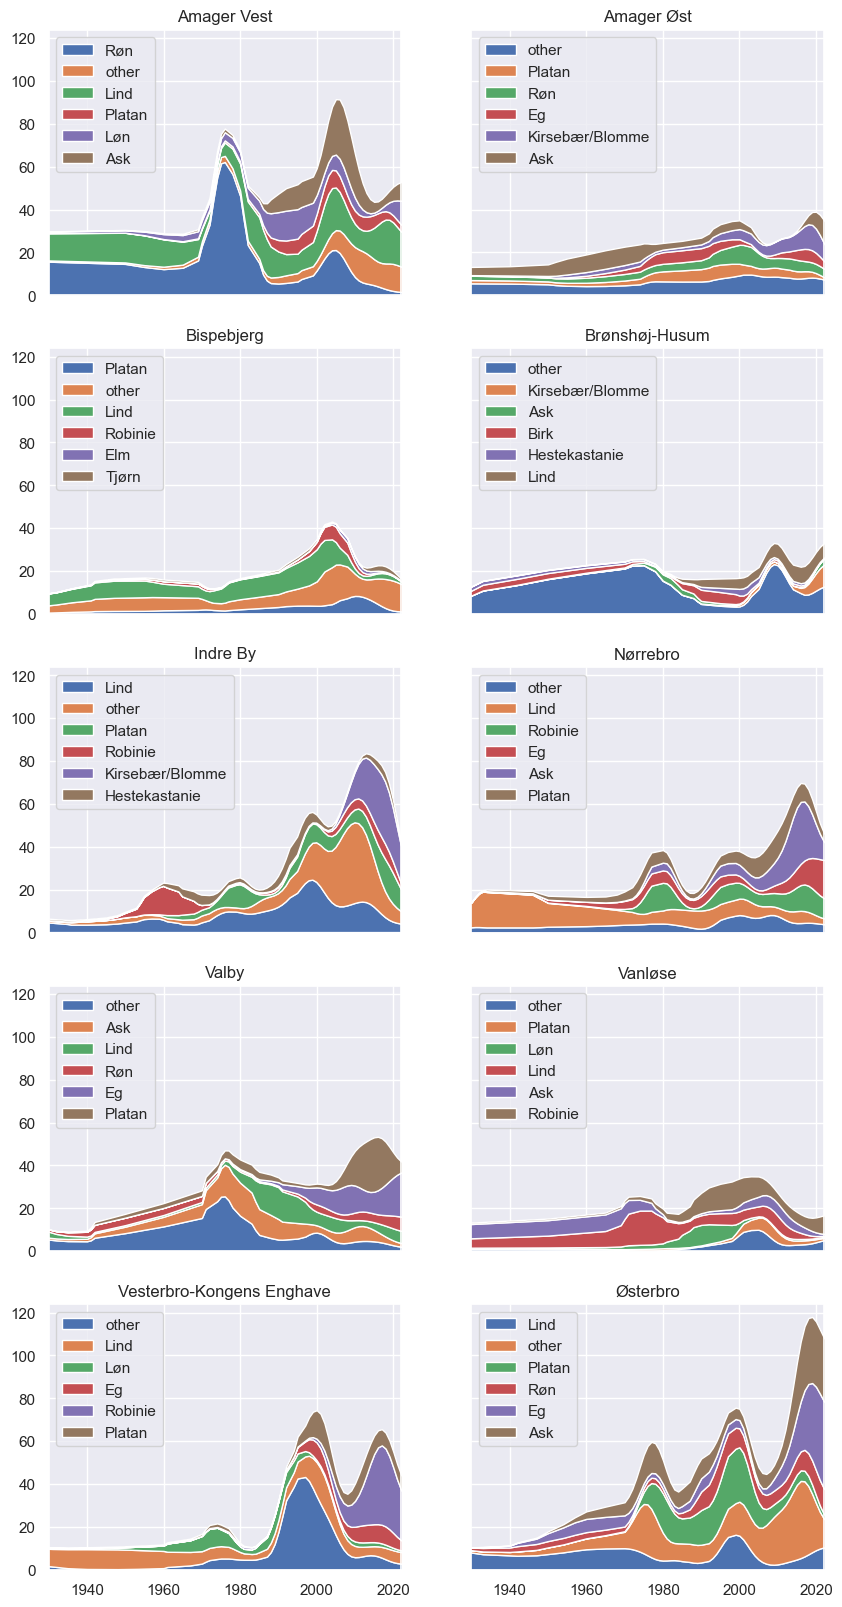

In [17]:
from scipy.ndimage import gaussian_filter1d
# Data

datat = data['bydelsnavn']
cityp, X = np.unique(datat, return_counts=True)

fig, axes = plt.subplots(5, 2, dpi = 100, sharex=True, sharey=True, figsize=(10,20))

for k, region in enumerate(cityp):
    ax = axes[k//2, k%2]
    ax.set_title(region)
    ax.set_xlim((1930,2022))
    datay = data['planteaar'][datat == region]
    datas = data['slaegtsnavn'][datat == region]

    years, X = np.unique(datay, return_counts=True)
    labels, X = np.unique(datas, return_counts=True)
    sel = np.argsort(X)[-5:][::-1]
    labels_sel = labels[sel] #np.r_[labels[sel], ['other']]
    other_amount = sum(X[~np.isin(np.arange(len(X)), sel)])
    labels_sel = np.insert(labels_sel, sum(other_amount < X[sel]),'other')

    y = [np.unique(datas[datay==i], return_counts=True) for i in years]
    # print(y)
    ys = np.zeros((len(labels_sel), len(y)))
    for n, i in enumerate(y):
        nam = i[0]
        val = i[1]
        pick = np.isin(nam, labels_sel)
        if not all(pick):
            nam = np.r_[nam[pick], ['other']]
            val = np.r_[val[pick], sum(val[~pick])]
        ys[np.isin(labels_sel, nam), n] = val

    # Plot
    # ys = savgol_filter(ys, 21, 5, mode = 'interp') 
    # print(ys.shape)
    ys = gaussian_filter1d(ys, 3)
    ax.stackplot(years,ys, labels=labels_sel)
    ax.legend(loc='upper left')

In [71]:
data['slaegtsnavn'][data['saerligt_trae']=='ja']
# np.unique(data['saerligt_trae'], return_counts=True)
# saerligt_trae

1637              Lind
2010              Lind
2012              Lind
2327            Platan
2462              Lind
2661     Hestekastanie
3365              Pære
3792           Robinie
3793           Robinie
5233              Lind
5236              Lind
5276              Lind
6838              Lind
7156            Platan
8157            Avnbøg
8933            Platan
8934            Platan
9299               Ask
9963              Lind
12516               Eg
13741           Gingko
17016          Robinie
17135          Robinie
18317             Lind
18465               Eg
18835             Lind
Name: slaegtsnavn, dtype: object

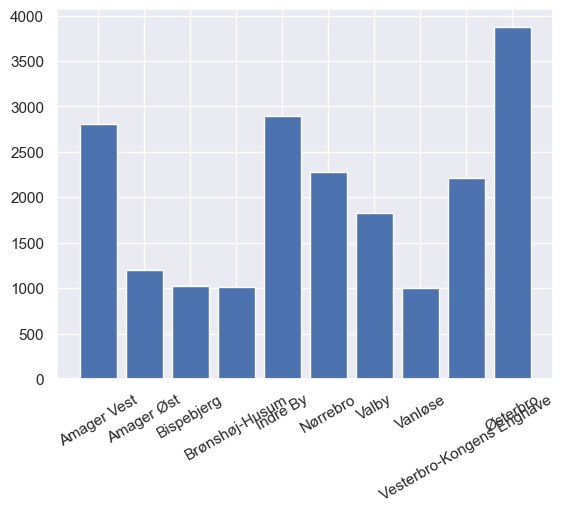

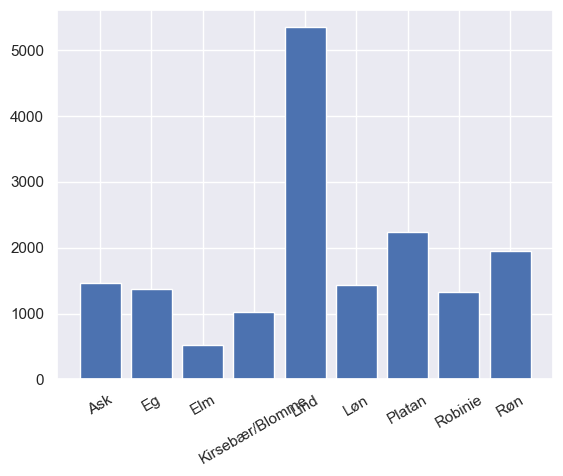

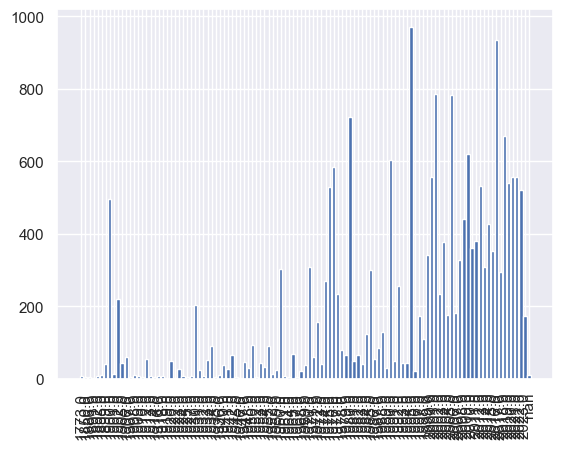

In [6]:


# Bydele
Labs, X, = np.unique(data['bydelsnavn'], return_counts=True)
fig, ax = plt.subplots()
y_pos = np.arange(len(X))
ax.bar(y_pos, X)
ax.set_xticks(y_pos, Labs, rotation=30)
plt.show()

# trees
Labs, X, = np.unique(data['slaegtsnavn'], return_counts=True)
sel = X>500
fig, ax = plt.subplots()
y_pos = np.arange(len(X[sel]))
ax.bar(y_pos, X[sel])
ax.set_xticks(y_pos, Labs[sel], rotation=30)
plt.show()

# year
Labs, X, = np.unique(data['planteaar'], return_counts=True)
fig, ax = plt.subplots()
y_pos = np.arange(len(X))
ax.bar(y_pos, X)
ax.set_xticks(y_pos, Labs, rotation=90)
plt.show()
